<div align="center">

#### Lab 3

# National Tsing Hua University

#### Spring 2025

#### 11320IEEM 513600

#### Deep Learning and Industrial Applications
    
## Lab 3: Anomaly Detection in Industrial Applications

</div>

### Introduction

In today's industrial landscape, the ability to detect anomalies in manufacturing processes and products is critical for maintaining quality, efficiency, and safety. This lab focuses on leveraging deep learning techniques for anomaly detection in various industrial applications, using the MVTEC Anomaly Detection Dataset. By employing ImageNet-pretrained models available in torchvision, students will gain hands-on experience in classfying defects and irregularities across different types of industrial products.

Throughout this lab, you'll be involved in the following key activities:
- Explore and process the MVTec Anomaly Detection Dataset.
- Apply ImageNet-pretrained models from [Torchvision](https://pytorch.org/vision/stable/models.html) to detect anomalies in industrial products.
- Evaluate the performance of the models to understand their effectiveness in real-world industrial applications.

### Objectives

- Understand the principles of anomaly detection in the context of industrial applications.
- Learn how to implement and utilize ImageNet-pretrained models for detecting anomalies.
- Analyze and interpret the results of the anomaly detection models to assess their practicality in industrial settings.

### Dataset

The MVTec AD Dataset is a comprehensive collection of high-resolution images across different categories of industrial products, such as bottles, cables, and metal nuts, each with various types of defects. This dataset is pivotal for developing and benchmarking anomaly detection algorithms. You can download our lab's dataset [here](https://drive.google.com/file/d/19600hUOpx0hl78TdpdH0oyy-gGTk_F_o/view?usp=share_link). You can drop downloaded data and drop to colab, or you can put into yor google drive.

### References
- [MVTec AD Dataset](https://www.kaggle.com/datasets/ipythonx/mvtec-ad/data) for the dataset used in this lab.
- [Torchvision Models](https://pytorch.org/vision/stable/models.html) for accessing ImageNet-pretrained models to be used in anomaly detection tasks.
- [State-of-the-Art Anomaly Detection on MVTec AD](https://paperswithcode.com/sota/anomaly-detection-on-mvtec-ad) for insights into the latest benchmarks and methodologies in anomaly detection applied to the MVTec AD dataset.
- [CVPR 2019: MVTec AD — A Comprehensive Real-World Dataset for Unsupervised Anomaly Detection] for the original paper of MVTec AD dataset.

In [2]:
import glob
import matplotlib.pyplot as plt
import random
from tqdm.auto import tqdm
import cv2
import numpy as np

In [3]:
from google.colab import drive

drive.mount('/content/drive')
#!tar -xvf drive/MyDrive/cable.tar.gz cable
#!unzip /content/drive/MyDrive/cable.zip -d /content/cable
!unzip /content/drive/MyDrive/bottle.zip -d /content/bottle

Mounted at /content/drive
Archive:  /content/drive/MyDrive/bottle.zip
  inflating: /content/bottle/bottle/ground_truth/broken_large/018_mask.png  
  inflating: /content/bottle/bottle/readme.txt  
  inflating: /content/bottle/bottle/ground_truth/broken_large/010_mask.png  
  inflating: /content/bottle/bottle/test/broken_small/003.png  
  inflating: /content/bottle/bottle/ground_truth/broken_large/000_mask.png  
  inflating: /content/bottle/bottle/ground_truth/broken_large/013_mask.png  
  inflating: /content/bottle/bottle/ground_truth/broken_large/008_mask.png  
  inflating: /content/bottle/bottle/ground_truth/broken_large/006_mask.png  
  inflating: /content/bottle/bottle/ground_truth/broken_large/017_mask.png  
  inflating: /content/bottle/bottle/test/broken_small/013.png  
  inflating: /content/bottle/bottle/ground_truth/broken_large/012_mask.png  
  inflating: /content/bottle/bottle/ground_truth/broken_large/003_mask.png  
  inflating: /content/bottle/bottle/ground_truth/broken_larg

In [4]:
import os

data_dir = "/content/bottle/bottle/train"
#data_dir = "/content/cable/cable/train"
class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in os.listdir(data_dir)}
print("training data:")
print(class_counts)

data_dir = "/content/bottle/bottle/test"
#data_dir = "/content/cable/cable/test"
class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in os.listdir(data_dir)}
print("test data:")
print(class_counts)

data_dir = "/content/bottle/bottle/ground_truth"
#data_dir = "/content/cable/cable/ground_truth"
class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in os.listdir(data_dir)}
print("ground_truth data:")
print(class_counts)


training data:
{'good': 209}
test data:
{'broken_large': 20, 'good': 20, 'broken_small': 22, 'contamination': 21}
ground_truth data:
{'broken_large': 20, 'broken_small': 22, 'contamination': 21}


In [5]:
#file_paths = glob.glob('/content/cable/*/*.png')
file_paths = glob.glob('/content/bottle/bottle/*/*/*.png')
file_paths = sorted([path for path in file_paths if path.split('/')[-1] in [f'{i:03}.png' for i in range(20)]])
print(file_paths)

['/content/bottle/bottle/test/broken_large/000.png', '/content/bottle/bottle/test/broken_large/001.png', '/content/bottle/bottle/test/broken_large/002.png', '/content/bottle/bottle/test/broken_large/003.png', '/content/bottle/bottle/test/broken_large/004.png', '/content/bottle/bottle/test/broken_large/005.png', '/content/bottle/bottle/test/broken_large/006.png', '/content/bottle/bottle/test/broken_large/007.png', '/content/bottle/bottle/test/broken_large/008.png', '/content/bottle/bottle/test/broken_large/009.png', '/content/bottle/bottle/test/broken_large/010.png', '/content/bottle/bottle/test/broken_large/011.png', '/content/bottle/bottle/test/broken_large/012.png', '/content/bottle/bottle/test/broken_large/013.png', '/content/bottle/bottle/test/broken_large/014.png', '/content/bottle/bottle/test/broken_large/015.png', '/content/bottle/bottle/test/broken_large/016.png', '/content/bottle/bottle/test/broken_large/017.png', '/content/bottle/bottle/test/broken_large/018.png', '/content/b

In [6]:
all_data = []

for img in tqdm(file_paths):
    img = cv2.imread(img)
    img = img[..., ::-1]
    all_data.append(img)

all_data = np.stack(all_data)
print(all_data.shape)

  0%|          | 0/100 [00:00<?, ?it/s]

(100, 900, 900, 3)


Classes: ['content']


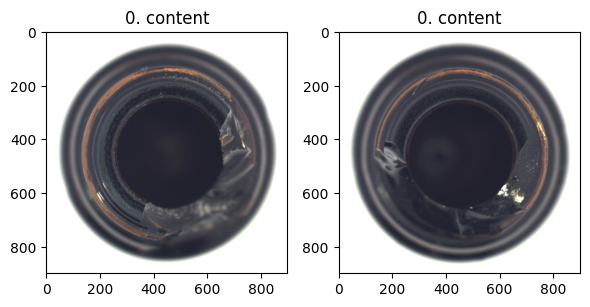

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 確保 file_paths 有值
if not file_paths:
    print("Error: file_paths is empty!")
else:
    classes = sorted(set([path.split('/')[1] for path in file_paths]))
    print(f'Classes: {classes}')

    images_per_class = len(all_data) // len(classes) if len(classes) > 0 else 0

    fig, axs = plt.subplots(len(classes), 2, figsize=(6, 4 * len(classes)))

    # 確保 axs 至少是 2D
    axs = np.atleast_2d(axs)

    for i, class_name in enumerate(classes):
        index = i * images_per_class
        for j in range(2):
            axs[i, j].set_title(f'{i}. {class_name}')
            if index + j < len(all_data):
                axs[i, j].imshow(all_data[index + j])
            else:
                axs[i, j].axis('off')  # 如果沒圖片，關閉該子圖

    plt.tight_layout()
    plt.show()


## A. Data Loading and Preprocessing

In [8]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np

num_classes = 3
images_per_class = 20
train_images_per_class = int(images_per_class * 0.8)
val_images_per_class = int(images_per_class * 0.2)

x_train = []
x_val = []

for i in range(num_classes):
    start_index = i * images_per_class
    x_train.extend(all_data[start_index:start_index + train_images_per_class])
    x_val.extend(all_data[start_index + train_images_per_class:start_index + images_per_class])

# The shape changes from (batch_size, height, width, channels) to (batch_size, channels, height, width)
x_train = np.transpose(np.array(x_train), (0, 3, 1, 2))
x_val = np.transpose(np.array(x_val), (0, 3, 1, 2))

y_train = np.concatenate([np.full(train_images_per_class, i) for i in range(num_classes)])
y_val = np.concatenate([np.full(val_images_per_class, i) for i in range(num_classes)])

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_val: {x_val.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_val: {y_val.shape}')

Shape of x_train: (48, 3, 900, 900)
Shape of x_val: (12, 3, 900, 900)
Shape of y_train: (48,)
Shape of y_val: (12,)


In [9]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image

train_transforms = transforms.Compose(
    [
        transforms.Resize((32, 32)),
        transforms.AutoAugment(),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]
)

val_transforms = transforms.Compose(
    [
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
    ]
)

class MyDataset(Dataset):
    def __init__(self, x, y, transform=None):
        self.x = x
        self.y = torch.from_numpy(y).long()
        self.transform = transform

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        new_x = np.transpose(self.x[idx], (1, 2, 0))
        return self.transform(Image.fromarray(new_x)), self.y[idx]

In [10]:
batch_size = 16  #16

train_dataset = MyDataset(x_train, y_train, train_transforms)
val_dataset = MyDataset(x_val, y_val, val_transforms)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True, persistent_workers=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=True, persistent_workers=True)

## B. Defining Neural Networks

In [11]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

model = models.resnet18(weights='IMAGENET1K_V1')

# Freeze pre-trained layers
# for param in model.parameters():
#     param.requires_grad = False

for param in model.layer4.parameters():  # 只訓練 layer4 和 fc
    param.requires_grad = True

num_ftrs = model.fc.in_features
num_class = 3  # 你的分類數量

# 增加一層隱藏層 (512 → 256 → 3)
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 64),  # 隱藏層 256 個神經元
    nn.ReLU(),                 # ReLU 激活函數
    nn.Dropout(0.3),           # Dropout，防止過擬合
    nn.Linear(64, num_class)  # 最終輸出層 (3 類)
)

print(model)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 107MB/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
import torch.nn as nn
import torchvision.models as models

# 使用 EfficientNet-B0
model = models.efficientnet_b0(weights='IMAGENET1K_V1')

# Freeze pre-trained layers
for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.classifier[1].in_features
num_class = 3  # 你的分類數量

# 替換分類層
model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 64),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(64, num_class)
)

print(model)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 117MB/s] 


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [19]:
import torch.nn as nn
import torchvision.models as models

# 使用 MobileNetV3 (small 版適合小數據集)
model = models.mobilenet_v3_small(weights='IMAGENET1K_V1')

# Freeze pre-trained layers
for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.classifier[0].in_features
num_class = 3  # 你的分類數量

# 替換分類層
model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 64),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(64, num_class)
)

print(model)


Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 23.7MB/s]

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [23]:
import torch.nn as nn
import torchvision.models as models

# 加載 ResNet50 預訓練模型
model = models.resnet50(weights='IMAGENET1K_V1')

# 凍結 ResNet50 的捲積層（只訓練最後幾層）
# for param in model.parameters():
#     param.requires_grad = False

for param in model.layer4.parameters():  # 只訓練 layer4 和 fc
    param.requires_grad = True

# 取得 ResNet50 最終全連接層的輸入特徵數量
num_ftrs = model.fc.in_features
num_class = 3  # 你的分類數量

# 替換全連接層 (512 → 128 → 3)
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 128),  # 隱藏層 128 神經元
    nn.ReLU(),
    nn.Dropout(0.4),  # Dropout 避免過擬合
    nn.Linear(128, num_class)  # 輸出層 (3 類)
)

# 顯示模型架構
print(model)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 180MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## C. Training the Neural Network

In [12]:
# resnet18
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from tqdm.auto import tqdm

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 300
model = model.cuda()

best_val_loss = float('inf')
best_val_acc = -1

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=5e-4)  #1e-3  #1e-4  #3e-4  #5e-4
lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)
#scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

for epoch in tqdm(range(epochs)):
    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for images, labels in train_loader:
        images = images.cuda()
        images = (images) / 255.
        labels = labels.cuda()
        optimizer.zero_grad()
        outputs = model(images)

        labels = labels.long()

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.cuda()
            images = (images) / 255.
            labels = labels.cuda()
            outputs = model(images)

            labels = labels.long()

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # Learning rate update
    lr_scheduler.step()
    #scheduler.step(avg_val_loss)

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f} Best Val acc: {best_val_acc:.2f}%')

    # Store performance
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

  0%|          | 0/300 [00:00<?, ?it/s]

Epoch 1/300, Train loss: 1.1373, Train acc: 35.4167%, Val loss: 1.1103, Val acc: 33.3333%, Best Val loss: 1.1103 Best Val acc: 33.33%
Epoch 2/300, Train loss: 1.0834, Train acc: 45.8333%, Val loss: 1.0991, Val acc: 33.3333%, Best Val loss: 1.0991 Best Val acc: 33.33%
Epoch 3/300, Train loss: 1.1300, Train acc: 43.7500%, Val loss: 1.1084, Val acc: 33.3333%, Best Val loss: 1.0991 Best Val acc: 33.33%
Epoch 4/300, Train loss: 1.1390, Train acc: 47.9167%, Val loss: 1.1299, Val acc: 33.3333%, Best Val loss: 1.0991 Best Val acc: 33.33%
Epoch 5/300, Train loss: 0.9989, Train acc: 45.8333%, Val loss: 1.1478, Val acc: 33.3333%, Best Val loss: 1.0991 Best Val acc: 33.33%
Epoch 6/300, Train loss: 1.0696, Train acc: 43.7500%, Val loss: 1.1695, Val acc: 33.3333%, Best Val loss: 1.0991 Best Val acc: 33.33%
Epoch 7/300, Train loss: 1.1544, Train acc: 35.4167%, Val loss: 1.1552, Val acc: 33.3333%, Best Val loss: 1.0991 Best Val acc: 33.33%
Epoch 8/300, Train loss: 1.2043, Train acc: 41.6667%, Val loss

In [24]:
# resnet50
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from tqdm.auto import tqdm

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 300
model = model.cuda()

best_val_loss = float('inf')
best_val_acc = -1

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=5e-4)  #1e-3  #1e-4  #3e-4  #5e-4
lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)
#scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

for epoch in tqdm(range(epochs)):
    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for images, labels in train_loader:
        images = images.cuda()
        images = (images) / 255.
        labels = labels.cuda()
        optimizer.zero_grad()
        outputs = model(images)

        labels = labels.long()

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.cuda()
            images = (images) / 255.
            labels = labels.cuda()
            outputs = model(images)

            labels = labels.long()

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # Learning rate update
    lr_scheduler.step()
    #scheduler.step(avg_val_loss)

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f} Best Val acc: {best_val_acc:.2f}%')

    # Store performance
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

  0%|          | 0/300 [00:00<?, ?it/s]

Epoch 1/300, Train loss: 1.1030, Train acc: 37.5000%, Val loss: 1.3870, Val acc: 33.3333%, Best Val loss: 1.3870 Best Val acc: 33.33%
Epoch 2/300, Train loss: 1.1229, Train acc: 41.6667%, Val loss: 1.6207, Val acc: 33.3333%, Best Val loss: 1.3870 Best Val acc: 33.33%
Epoch 3/300, Train loss: 1.0689, Train acc: 45.8333%, Val loss: 1.6443, Val acc: 33.3333%, Best Val loss: 1.3870 Best Val acc: 33.33%
Epoch 4/300, Train loss: 1.0688, Train acc: 41.6667%, Val loss: 3.4787, Val acc: 33.3333%, Best Val loss: 1.3870 Best Val acc: 33.33%
Epoch 5/300, Train loss: 1.0013, Train acc: 47.9167%, Val loss: 6.4445, Val acc: 33.3333%, Best Val loss: 1.3870 Best Val acc: 33.33%
Epoch 6/300, Train loss: 1.0050, Train acc: 47.9167%, Val loss: 5.7991, Val acc: 33.3333%, Best Val loss: 1.3870 Best Val acc: 33.33%
Epoch 7/300, Train loss: 1.5123, Train acc: 35.4167%, Val loss: 2.1458, Val acc: 33.3333%, Best Val loss: 1.3870 Best Val acc: 33.33%
Epoch 8/300, Train loss: 1.0780, Train acc: 41.6667%, Val loss

In [16]:
# efficientnetb0
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from tqdm.auto import tqdm

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 300
model = model.cuda()

best_val_loss = float('inf')
best_val_acc = -1

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=5e-4)  #1e-3  #1e-4  #3e-4  #5e-4
lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)
#scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

for epoch in tqdm(range(epochs)):
    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for images, labels in train_loader:
        images = images.cuda()
        images = (images) / 255.
        labels = labels.cuda()
        optimizer.zero_grad()
        outputs = model(images)

        labels = labels.long()

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.cuda()
            images = (images) / 255.
            labels = labels.cuda()
            outputs = model(images)

            labels = labels.long()

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # Learning rate update
    lr_scheduler.step()
    #scheduler.step(avg_val_loss)

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f} Best Val acc: {best_val_acc:.2f}%')

    # Store performance
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

  0%|          | 0/300 [00:00<?, ?it/s]

Epoch 1/300, Train loss: 1.1283, Train acc: 31.2500%, Val loss: 1.1047, Val acc: 33.3333%, Best Val loss: 1.1047 Best Val acc: 33.33%
Epoch 2/300, Train loss: 1.1045, Train acc: 25.0000%, Val loss: 1.1005, Val acc: 33.3333%, Best Val loss: 1.1005 Best Val acc: 33.33%
Epoch 3/300, Train loss: 1.1057, Train acc: 41.6667%, Val loss: 1.1008, Val acc: 33.3333%, Best Val loss: 1.1005 Best Val acc: 33.33%
Epoch 4/300, Train loss: 1.1007, Train acc: 33.3333%, Val loss: 1.1002, Val acc: 33.3333%, Best Val loss: 1.1002 Best Val acc: 33.33%
Epoch 5/300, Train loss: 1.1028, Train acc: 33.3333%, Val loss: 1.1021, Val acc: 33.3333%, Best Val loss: 1.1002 Best Val acc: 33.33%
Epoch 6/300, Train loss: 1.0764, Train acc: 35.4167%, Val loss: 1.1055, Val acc: 33.3333%, Best Val loss: 1.1002 Best Val acc: 33.33%
Epoch 7/300, Train loss: 1.0888, Train acc: 33.3333%, Val loss: 1.1065, Val acc: 33.3333%, Best Val loss: 1.1002 Best Val acc: 33.33%
Epoch 8/300, Train loss: 1.0372, Train acc: 43.7500%, Val loss

In [20]:
# mobilenetv3
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from tqdm.auto import tqdm

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 300
model = model.cuda()

best_val_loss = float('inf')
best_val_acc = -1

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=5e-4)  #1e-3  #1e-4  #3e-4  #5e-4
lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)
#scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

for epoch in tqdm(range(epochs)):
    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for images, labels in train_loader:
        images = images.cuda()
        images = (images) / 255.
        labels = labels.cuda()
        optimizer.zero_grad()
        outputs = model(images)

        labels = labels.long()

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.cuda()
            images = (images) / 255.
            labels = labels.cuda()
            outputs = model(images)

            labels = labels.long()

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # Learning rate update
    lr_scheduler.step()
    #scheduler.step(avg_val_loss)

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f} Best Val acc: {best_val_acc:.2f}%')

    # Store performance
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

  0%|          | 0/300 [00:00<?, ?it/s]

Epoch 1/300, Train loss: 1.0950, Train acc: 43.7500%, Val loss: 1.1061, Val acc: 33.3333%, Best Val loss: 1.1061 Best Val acc: 33.33%
Epoch 2/300, Train loss: 1.0608, Train acc: 47.9167%, Val loss: 1.1062, Val acc: 33.3333%, Best Val loss: 1.1061 Best Val acc: 33.33%
Epoch 3/300, Train loss: 1.1055, Train acc: 37.5000%, Val loss: 1.1049, Val acc: 33.3333%, Best Val loss: 1.1049 Best Val acc: 33.33%
Epoch 4/300, Train loss: 1.1794, Train acc: 31.2500%, Val loss: 1.1031, Val acc: 33.3333%, Best Val loss: 1.1031 Best Val acc: 33.33%
Epoch 5/300, Train loss: 1.1287, Train acc: 33.3333%, Val loss: 1.1021, Val acc: 33.3333%, Best Val loss: 1.1021 Best Val acc: 33.33%
Epoch 6/300, Train loss: 1.1190, Train acc: 33.3333%, Val loss: 1.1019, Val acc: 33.3333%, Best Val loss: 1.1019 Best Val acc: 33.33%
Epoch 7/300, Train loss: 1.1781, Train acc: 37.5000%, Val loss: 1.1034, Val acc: 33.3333%, Best Val loss: 1.1019 Best Val acc: 33.33%
Epoch 8/300, Train loss: 1.1193, Train acc: 35.4167%, Val loss

### Visualizing model performance

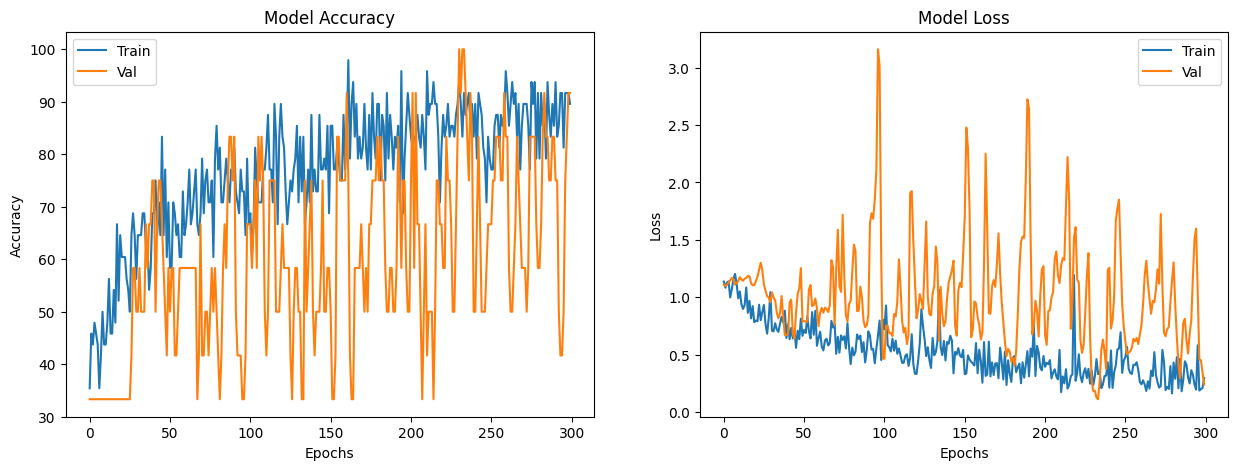

In [13]:
# resnet18
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

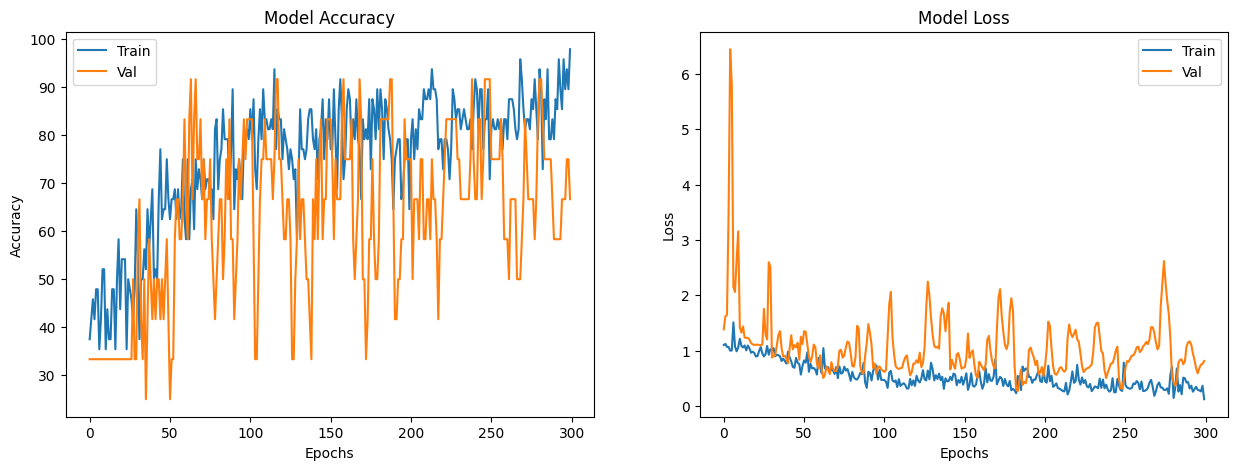

In [25]:
# resnet50
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

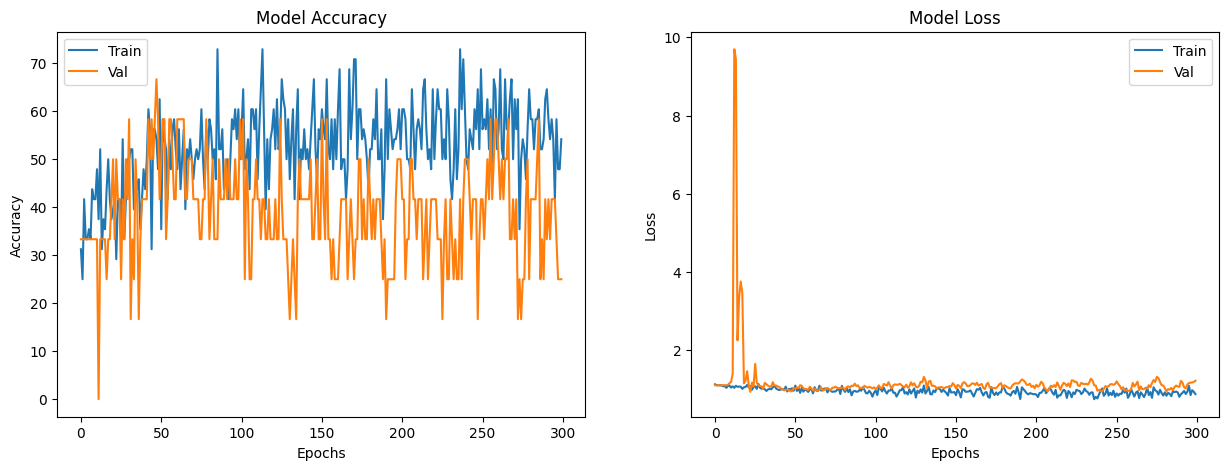

In [17]:
# efficientnetb0
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

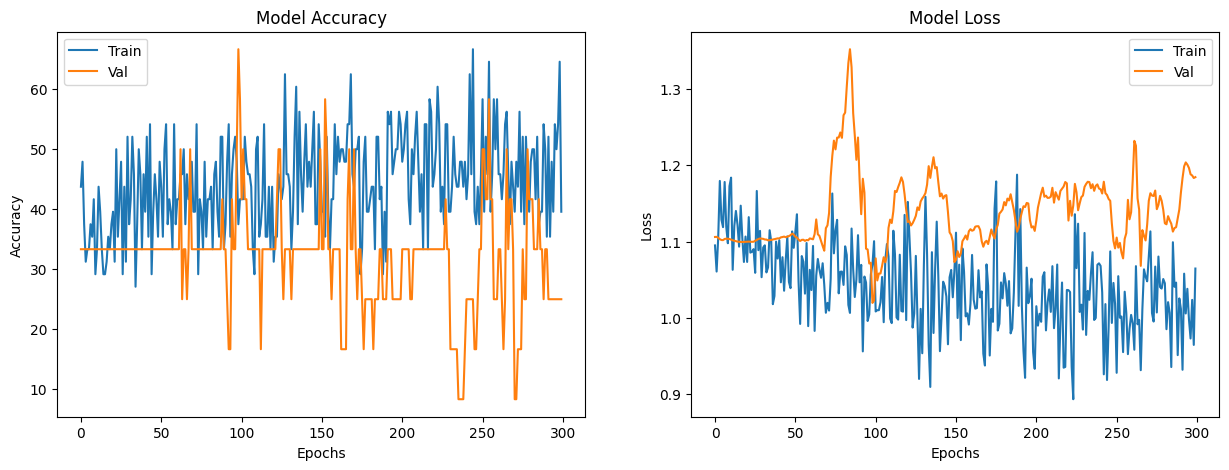

In [21]:
# mobilenetv3
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

In [14]:
# resnet18
# Load the trained weights
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in val_loader:

        images = images.cuda()
        images = (images) / 255.

        labels = labels.cuda()
        labels = labels.long()

        outputs = model(images)

        predicted = outputs.argmax(-1)
        print(predicted)
        print(labels)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total}%')

tensor([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], device='cuda:0')
tensor([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], device='cuda:0')
Test accuracy is 100.0%


In [26]:
#ResNet50
# Load the trained weights
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in val_loader:

        images = images.cuda()
        images = (images) / 255.

        labels = labels.cuda()
        labels = labels.long()

        outputs = model(images)

        predicted = outputs.argmax(-1)
        print(predicted)
        print(labels)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total}%')

tensor([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2], device='cuda:0')
tensor([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], device='cuda:0')
Test accuracy is 91.66666666666667%


## D. Evaluating Your Trained Model

In [18]:
# efficientnetb0
# Load the trained weights
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in val_loader:

        images = images.cuda()
        images = (images) / 255.

        labels = labels.cuda()
        labels = labels.long()

        outputs = model(images)

        predicted = outputs.argmax(-1)
        print(predicted)
        print(labels)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total}%')

tensor([0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1], device='cuda:0')
tensor([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], device='cuda:0')
Test accuracy is 66.66666666666667%


### Load Trained Model and Evaluate

In [22]:
# mobilenetv3
# Load the trained weights
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in val_loader:

        images = images.cuda()
        images = (images) / 255.

        labels = labels.cuda()
        labels = labels.long()

        outputs = model(images)

        predicted = outputs.argmax(-1)
        print(predicted)
        print(labels)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total}%')

tensor([0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 2], device='cuda:0')
tensor([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], device='cuda:0')
Test accuracy is 66.66666666666667%
